In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

## Functions 

In [111]:
def plot_data(x, y, xlbl, ylbl):
    plt.scatter(x, y, c='r', marker="x")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()
    
def compute_cost(X, y, theta):
    m = y.size    
    error = np.dot(X, theta)
    pred = error - y
    cost = sum(pred**2) / (2 * m)
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):

        J_history[i] = compute_cost(X, y, theta)
        hypo = np.dot(X, theta).flatten()
        error = hypo - y

        theta = theta - (alpha * ((np.sum(error[:, np.newaxis] * X, 0)) / m))

    return theta, J_history
    
    
def feature_normalize(X):
    n = X.shape[1] 
    mu = np.zeros(n)
    sigma = np.zeros(n)

    mu = np.mean(X, 0)
    sigma = np.std(X, 0, ddof=1)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma


def normal_eqn(X, y):
    theta = np.zeros((X.shape[1], 1))


    Xt = np.transpose(X)

    #Theta = X^T(X^T * X)-1 * y
    theta = np.linalg.pinv(Xt.dot(X)).dot(Xt).dot(y)
    


## Part 1: Plotting

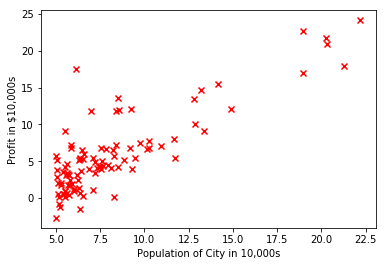

In [112]:
data = pd.read_csv('ex1data1.txt', header=None)
data.columns = ['population', 'profit' ]

plt.ion()
plt.figure(1)
plot_data(data['population'], data['profit'], 'Population of City in 10,000s', 'Profit in $10,000s')

## Part 2: Gradient Descent

In [113]:
y = data['profit'].values
m = y.size

alpha = 0.01 #The learning rate
epochs = 1500

In [114]:
X = np.c_[np.ones(m), data['population'].values] #now dim(len(x), 2)
theta = np.zeros(2) # dim(2, 1)

In [115]:
"initial cost: " +  str(compute_cost(X, y, theta))

'initial cost: 32.072733877455654'

In [116]:
theta, J_history = gradient_descent(X, y, theta, alpha, epochs)

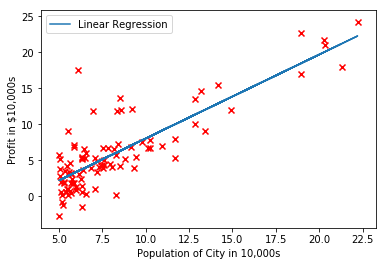

In [117]:
plt.figure(1)
line1, = plt.plot(X[:, 1], np.dot(X, theta), label='Linear Regression')
plt.legend(handles=[line1])
plot_data(data['population'], data['profit'], 'Population of City in 10,000s', 'Profit in $10,000s')
plt.show()

In [118]:
# Predictions:
predict1 = np.dot(np.array([1, 3.5]), theta)
predict2 = np.dot(np.array([1, 7]), theta)
predict3 = np.dot(np.array([1, 15]), theta)
print("Prediction 1: " + str(predict1))
print("Prediction 2: " + str(predict2))
print("Prediction 3: " + str(predict3))

Prediction 1: 0.4519767867701767
Prediction 2: 4.534245012944714
Prediction 3: 13.86514381562937


## Visualizating J(θ)

In [119]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

xs, ys = np.meshgrid(theta0_vals, theta1_vals)
J_vals = np.zeros(xs.shape)

In [120]:
# Fill out J_vals
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i][j] = compute_cost(X, y, t)

J_vals = np.transpose(J_vals)

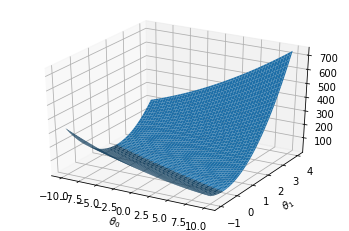

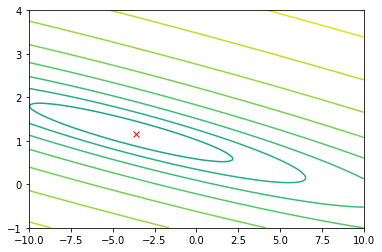

In [121]:
fig1 = plt.figure(2)
ax = fig1.gca(projection='3d')
ax.plot_surface(xs, ys, J_vals)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.figure(3)
lvls = np.logspace(-2, 3, 20)
plt.contour(xs, ys, J_vals, levels=lvls, norm=LogNorm())
plt.plot(theta[0], theta[1], c='r', marker="x")

## Linear regression with multiple variables

In [122]:
data = np.loadtxt('ex1data2.txt', delimiter=',', dtype=np.int64)
X = data[:, 0:2]
y = data[:, 2]
m = y.size

In [123]:
X, mu, sigma = feature_normalize(X)
X = np.c_[np.ones(m), X]

Theta computed from gradient descent : 
[340410.91897274 110308.11337059  -6326.5381075 ]


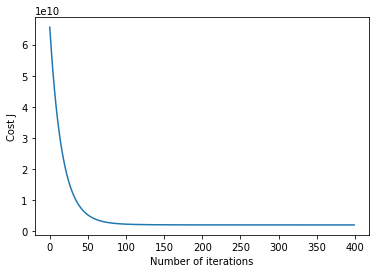

In [124]:
alpha = 0.03
num_iters = 400

theta = np.zeros(3)
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)


plt.figure()
plt.plot(np.arange(J_history.size), J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

print('Theta computed from gradient descent : \n{}'.format(theta))